In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_fires_cleaned')

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
# drop, day, month and year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
# let's clean the classes column
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [11]:
# Independent and Dependent Feature
X = df.drop('FWI', axis=1)
y = df['FWI']

In [12]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [14]:
# Train / Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [15]:
X_train.shape, y_train.shape

((181, 11), (181,))

<Axes: >

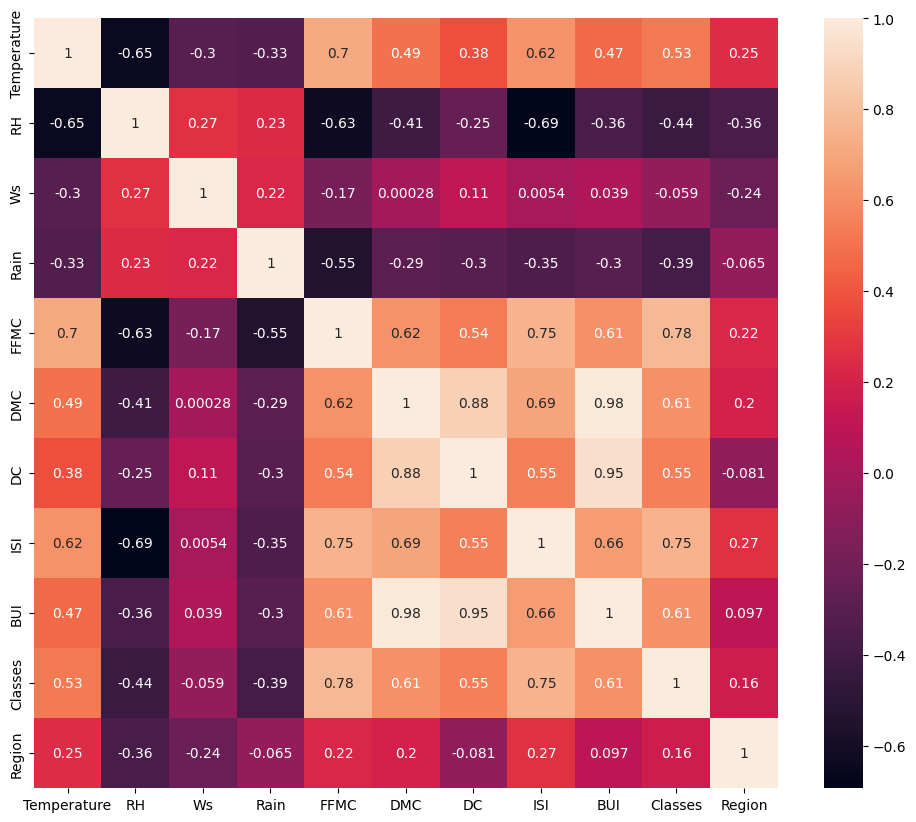

In [16]:
# feature selection according to correlation
corr = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)

In [17]:
# Seeting a threshold for correlation in netqeen independent variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [18]:
# Let's test it with some arbitrary threshhold
correlation(X_train,0.95)

{'BUI'}

In [19]:
# normally, your threshold is given by the domain expert
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [20]:
#  Now we actually drop them from the Training data
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape


((181, 9), (61, 9))

In [21]:
# Feature Scaling (Standardization in this case)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


Text(0.5, 1.0, 'X_train after scaling')

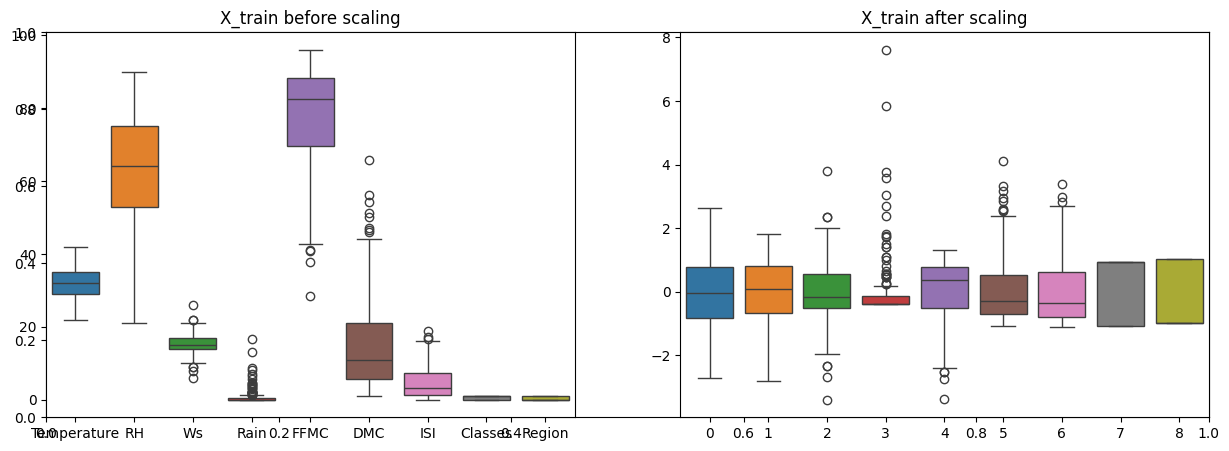

In [22]:
# Let's take a look at how different data looks like when it is scaled v. not
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [24]:
linreg=LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Absolute Error: 0.8512142101975164
R2 Score: 0.9755741549678955


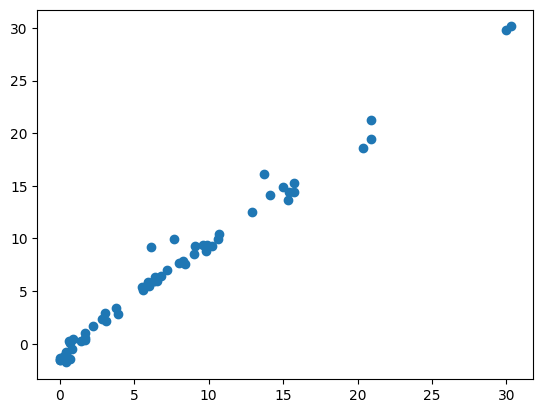

In [25]:
plt.scatter(y_test, y_pred)

### Lasso Regression

In [26]:
from sklearn.linear_model import Lasso

In [27]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Absolute Error: 0.9844679399280253
R2 Score: 0.9576617587983329


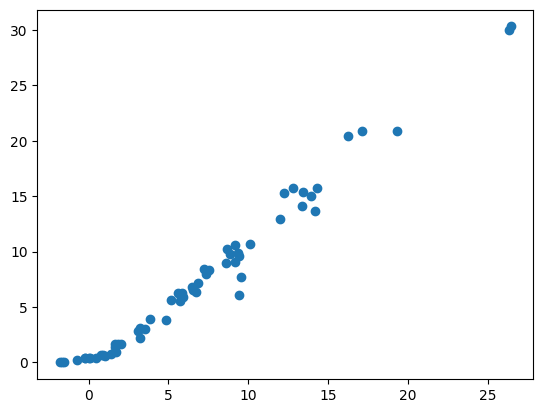

In [28]:
plt.scatter(y_pred, y_test)

### Ridge Regression Model

In [29]:
from sklearn.linear_model import Ridge


In [30]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Absolute Error: 0.8510293765016322
R2 Score: 0.9753222396484302


### ElasticNet (Combining both Ridge and Lasso)

In [31]:
from sklearn.linear_model import ElasticNet

In [32]:
elNet = ElasticNet()
elNet.fit(X_train_scaled, y_train)
y_pred = elNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

Mean Absolute Error: 1.6026259003953327
R2 Score: 0.8861588958374857


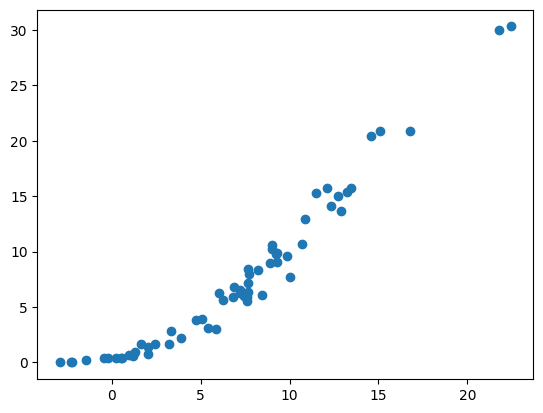

In [33]:
plt.scatter(y_pred, y_test)

## Pickling our most relevant algos

In [34]:
# from aprocessing point of view, our:
    # Scaler
    # ridge
# constitute the most replicapble processes when deploting our algorithm

# thus, let's pickle them

In [35]:
scaler

StandardScaler()

In [36]:
ridge

Ridge()

In [37]:
import pickle

In [38]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))